In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import Counter

In [3]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

## Rule 30 MIPT moments nsteps=0.5*Bsites
Asites=1,Bsites=100*i,nsteps=0.5*Bsites, pertb=0:0.25:0.001, 1,2,3,4,8,10,12

Asites=1,Bsites=100*i,nsteps=0.5*Bsites, pertb=0.15:0.3:0.003, highpres, n1,n2,n3,n4

Asites=1,Bsites=100*i,nsteps=0.5*Bsites, pertb=0.25:0.3:0.001, 21,22,23,24

Asites=j,Bsites=100*i,nsteps=0.5*Bsites, pertb=0.0:0.3:0.001, 40-60, n40-n60, (40+5*(j-1)+i)

0.298


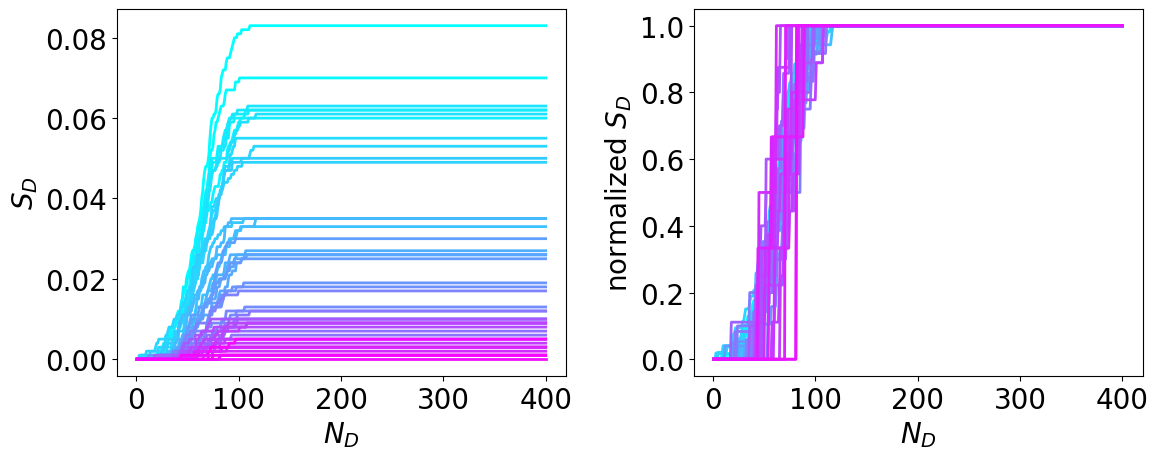

In [35]:
# file_idx = 77
file_idx = 24
file_name = "../data/240405/240405_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

plt.figure(figsize=(12,5))
cmap = mpl.colormaps['cool']

# plt.xlim([0,100])
plt.subplot(1,2,1)
for pertb_idx in range(0,len(pertb_l),1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:],c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("$N_D$")
    plt.ylabel("$S_D$")

plt.subplot(1,2,2)
for pertb_idx in range(0,len(pertb_l),1):
    if np.average(S_ave_arr[pertb_idx,-10:]) == 0:
        print(pertb_l[pertb_idx])
        break
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / np.average(S_ave_arr[pertb_idx,-10:]),c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("$N_D$")
    plt.ylabel("normalized $S_D$")

plt.tight_layout()

scaling of measurements at 0.5*nBsites

0.247


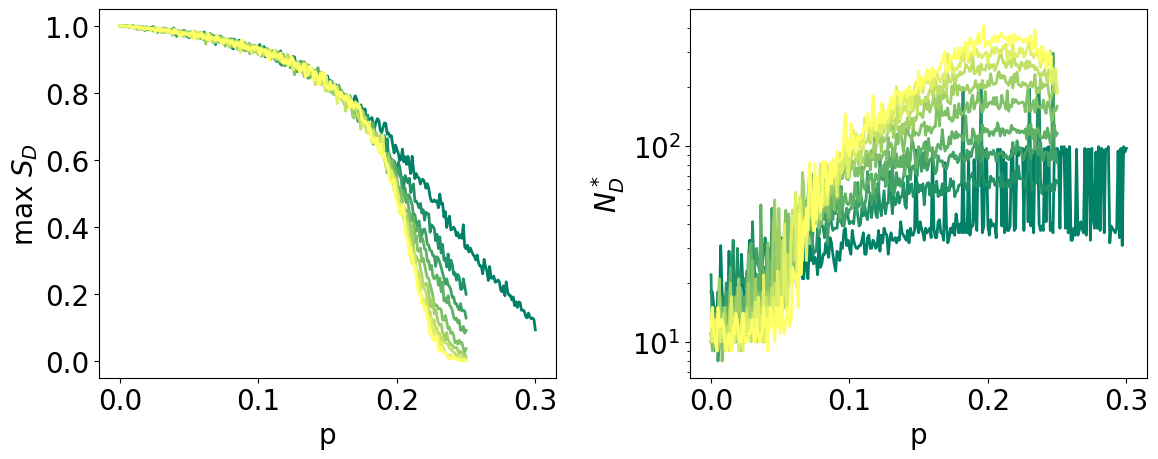

In [121]:
plt.figure(figsize=(12,5))
cmap = mpl.colormaps['summer']
# nsteps=0.5*nBsites
# for file_idx in [31,32,33,34]:
for nB_idx,file_idx in enumerate([1,2,3,4,6,8,10,12,14]):
# nAsites = 5
# file_idx_l = (40+5*(nAsites-1))+np.array([1,2,3,4,5])
# for nB_idx,file_idx in enumerate(file_idx_l):
    file_name = "../data/240405/240405_%d"%(file_idx)
    nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
    S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
    S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
    S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

    pertb_upper_idx = len(pertb_l)
    mid_point_l = []
    for pertb_idx in range(0,len(pertb_l),1):
        if np.average(S_ave_arr[pertb_idx,-10:]) == 0:
            pertb_upper_idx = pertb_idx
            print(pertb_l[pertb_idx])
            break
        min_idx = np.argmin(np.abs(S_ave_arr[pertb_idx,:]-(nAsites/2)*np.average(S_ave_arr[pertb_idx,-10:])))
        mid_point_l.append(min_idx)
    
    mid_point_l = np.array(mid_point_l)
    plt.subplot(1,2,1)
    plt.plot(pertb_l,np.average(S_ave_arr[:,-10:],axis=1),c=cmap(nB_idx/8))
    plt.xlabel("p")
    plt.ylabel("max $S_D$")
    plt.subplot(1,2,2)
    plt.plot(pertb_l[0:pertb_upper_idx],mid_point_l,c=cmap(nB_idx/8))
    # plt.plot(pertb_l[0:pertb_upper_idx],mid_point_l/(100*(nB_idx+1)),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("$N_D^*$")
    plt.yscale('log')

plt.tight_layout()
    


look at kurtosis

/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_4106/716872992.py:16: RuntimeWarning: divide by zero encountered in divide
  S_kurt_arr = S_cfth_arr / (S_csnd_arr**2)
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_4106/716872992.py:16: RuntimeWarning: invalid value encountered in divide
  S_kurt_arr = S_cfth_arr / (S_csnd_arr**2)


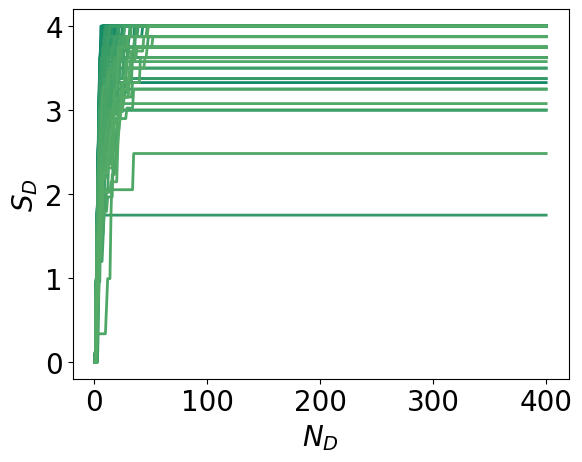

In [125]:
file_idx = 59
file_name = "../data/240405/240405_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

S_csnd_arr = S_snd_arr - S_ave_arr**2
S_ctrd_arr = 2*S_ave_arr**3 - 3*S_ave_arr*S_snd_arr + S_trd_arr
S_cfth_arr = -3*S_ave_arr**4 + 6*S_ave_arr**2*S_snd_arr - 4*S_ave_arr*S_trd_arr + S_fth_arr

S_kurt_arr = S_cfth_arr / (S_csnd_arr**2)

for pertb_idx in range(0,100,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:],c=cmap((pertb_idx)/len(pertb_l)))
    # plt.plot(nmeas_l, S_csnd_arr[pertb_idx,:]/(S_ave_arr[pertb_idx,:]*(1-S_ave_arr[pertb_idx,:])),c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("$N_D$")
    plt.ylabel("$S_D$")
    # plt.yscale('log')

### Kurtosis at high sample

/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_4106/1215731600.py:16: RuntimeWarning: invalid value encountered in divide
  S_kurt_arr = S_cfth_arr / (S_csnd_arr**2)


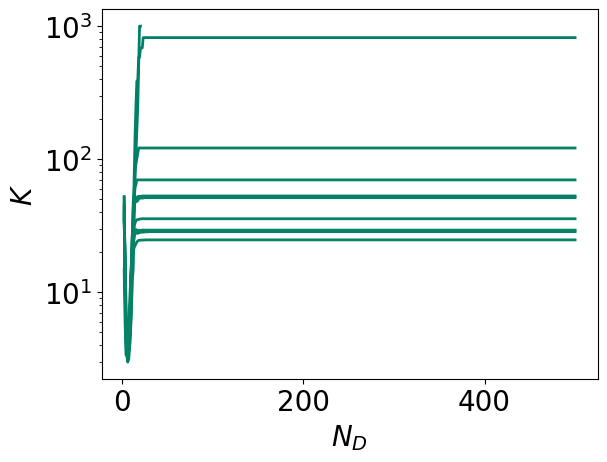

In [134]:
file_idx = 60
file_name = "../data/240405/240405_n%d_pp.npz"%(file_idx)

raw = np.load(file_name)
nmeas_l = raw['x_l']
pertb_l = raw['y_l']
S_ave_arr = raw['data_ave_l']
S_snd_arr = raw['data_snd_l']
S_trd_arr = raw['data_trd_l']
S_fth_arr = raw['data_fth_l']

S_csnd_arr = S_snd_arr - S_ave_arr**2
S_ctrd_arr = 2*S_ave_arr**3 - 3*S_ave_arr*S_snd_arr + S_trd_arr
S_cfth_arr = -3*S_ave_arr**4 + 6*S_ave_arr**2*S_snd_arr - 4*S_ave_arr*S_trd_arr + S_fth_arr

S_kurt_arr = S_cfth_arr / (S_csnd_arr**2)

for pertb_idx in range(0,10,1):
    plt.plot(nmeas_l, S_kurt_arr[pertb_idx,:],c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("$N_D$")
    plt.ylabel("$K$")
    plt.yscale('log')

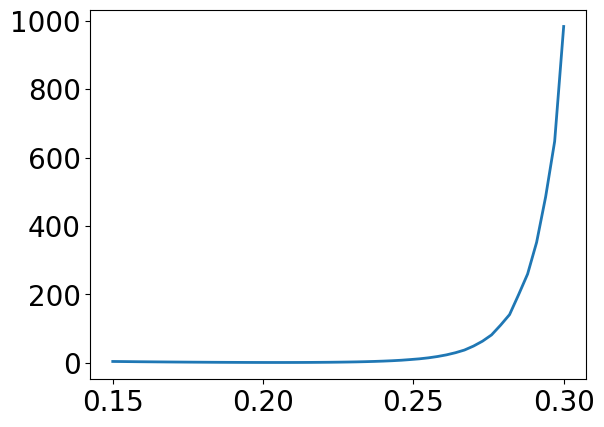

In [105]:
plt.plot(pertb_l, S_kurt_arr[:,-1])

In [100]:
pertb_l

array([0.15 , 0.153, 0.156, 0.159, 0.162, 0.165, 0.168, 0.171, 0.174,
       0.177, 0.18 , 0.183, 0.186, 0.189, 0.192, 0.195, 0.198, 0.201,
       0.204, 0.207, 0.21 , 0.213, 0.216, 0.219, 0.222, 0.225, 0.228,
       0.231, 0.234, 0.237, 0.24 , 0.243, 0.246, 0.249, 0.252, 0.255,
       0.258, 0.261, 0.264, 0.267, 0.27 , 0.273, 0.276, 0.279, 0.282,
       0.285, 0.288, 0.291, 0.294, 0.297, 0.3  ])

## Rule 30 MIPT moments nsteps=3.5*Bsites
Asites=1,Bsites=100*i,nsteps=3.5*Bsites, pertb=0:0.3:0.001, 2,4,6,8

0.216


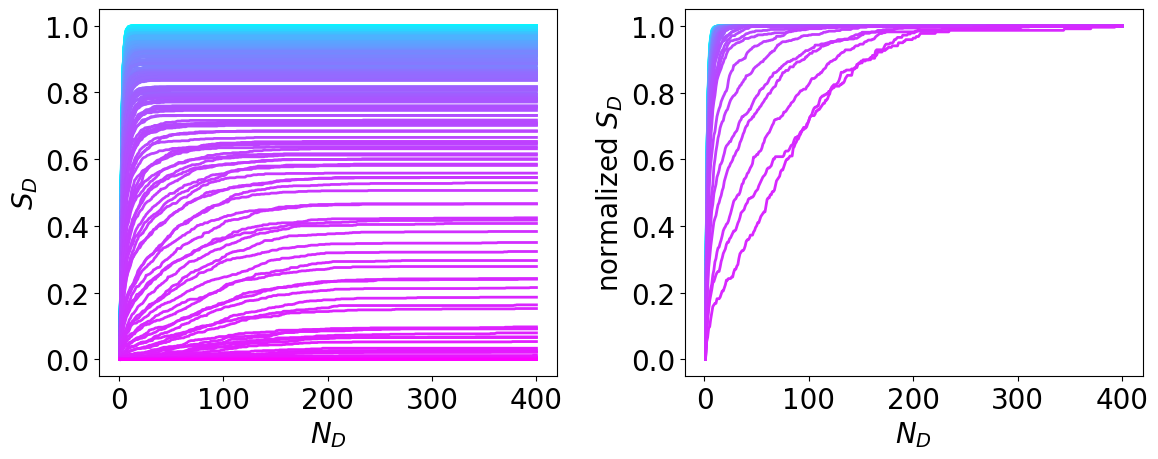

In [14]:
# file_idx = 77
file_idx = 104
file_name = "../data/240405/240405_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

plt.figure(figsize=(12,5))
cmap = mpl.colormaps['cool']

# plt.xlim([0,100])
plt.subplot(1,2,1)
for pertb_idx in range(0,len(pertb_l),1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:],c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("$N_D$")
    plt.ylabel("$S_D$")

plt.subplot(1,2,2)
for pertb_idx in range(0,len(pertb_l),4):
    if np.average(S_ave_arr[pertb_idx,-10:]) < 0.1:
        print(pertb_l[pertb_idx])
        break
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / np.average(S_ave_arr[pertb_idx,-10:]),c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("$N_D$")
    plt.ylabel("normalized $S_D$")

plt.tight_layout()

scaling of measurements at 3.5*nBsites

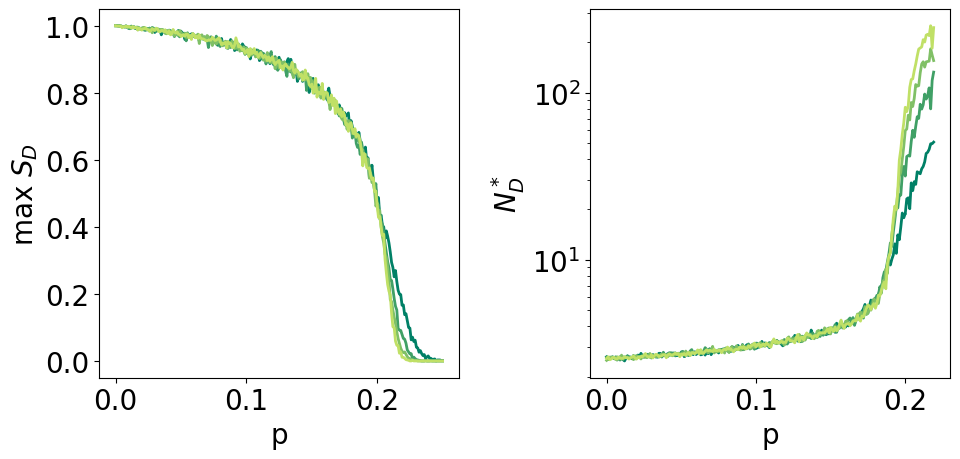

In [8]:
plt.figure(figsize=(10,5))
cmap = mpl.colormaps['summer']
# nAsites = 5
file_idx_l = (100)+np.array([2,4,6,8])

for nB_idx,file_idx in enumerate(file_idx_l):
    file_name = "../data/240405/240405_%d"%(file_idx)
    nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
    S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
    S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
    S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

    def fit_exp(x,x0,A):
        return A*(1-np.exp(-x/x0))

    meas0_l = []
    meas0_std_l = []
    pertb_upper_idx = 220
    for pertb_idx in range(0,pertb_upper_idx ,1):
        if np.average(S_ave_arr[pertb_idx,-10:]) <= 1e-3:
            pertb_upper_idx = pertb_idx
            print(pertb_l[pertb_idx])
            break
        popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
        meas0_l.append(popt[0])
        meas0_std_l.append(np.sqrt(pcov[0,0]))
    
    meas0_l = np.array(meas0_l)
    meas0_std_l = np.array(meas0_std_l)
    plt.subplot(1,2,1)
    plt.plot(pertb_l,np.average(S_ave_arr[:,-10:],axis=1),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("max $S_D$")
    plt.subplot(1,2,2)
    # plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)
    plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l/(100*(nB_idx+1)),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("$N_D^*$")
    plt.yscale('log')
    # plt.xlim([0,0.25])
    # plt.ylim([0,10])
    
plt.tight_layout()

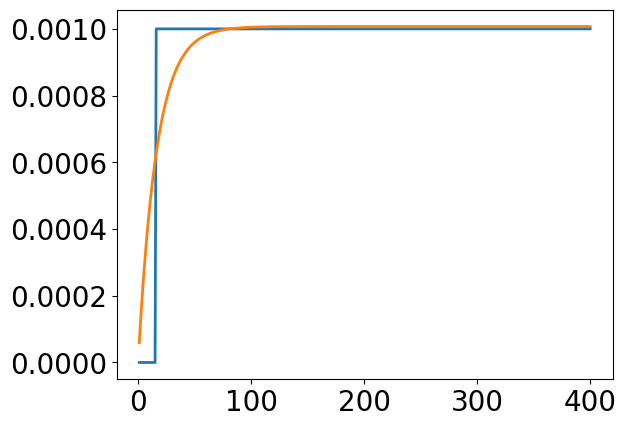

In [727]:
plt.plot(nmeas_l, S_ave_arr[pertb_idx-1,:])
plt.plot(nmeas_l,fit_exp(nmeas_l,*popt))